In [1]:
def experiment(X, y):
    # 1. Получение важности из Sklearn и rfpimp (Возвращает (Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, _, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    # 2. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    # 3. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    # 4. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 5. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')

    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA)')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R_RF(MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R_Ranger(Modified MDI)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RFSRC(MDA)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party(MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit(MDA)')

    picture(importance_series_list, titles_list)
    return importance_series_list

<font size="8">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<font size="8">Source features.</font>

[I 2025-12-24 12:59:33,785] A new study created in memory with name: no-name-139074b4-b6a2-4708-99d5-2e9420b96d6f
[I 2025-12-24 12:59:34,466] Trial 0 finished with value: 0.7083153922139763 and parameters: {'n_estimators': 28, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7083153922139763.
[I 2025-12-24 12:59:35,048] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 60, 'max_depth': 1, 'min_samples_leaf': 11, 'max_features': 1.0}. Best is trial 0 with value: 0.7083153922139763.
[I 2025-12-24 12:59:36,421] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 149, 'max_depth': 2, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7083153922139763.
[I 2025-12-24 12:59:37,517] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 128, 'max_depth': 1, 'min_samples_leaf': 2, 'max_features': 0.25}. Best is trial 0 with value: 0.7083

{'n_estimators': 103, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 0.7}
best_params: {'n_estimators': 103, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 0.7}
the importance of sklearn: price        0.361834
latitude     0.255208
longitude    0.246891
bedrooms     0.113131
bathrooms    0.022936
dtype: float64
the importance of rfpimp: price        0.139601
bedrooms     0.093000
longitude    0.034748
latitude     0.017931
bathrooms    0.001520
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        5352.785027
latitude     4270.669533
longitude    4226.887826
bedrooms     1101.191161
bathrooms     260.670396
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Successfully computed variable importance for CLASSIFICATION
the impo

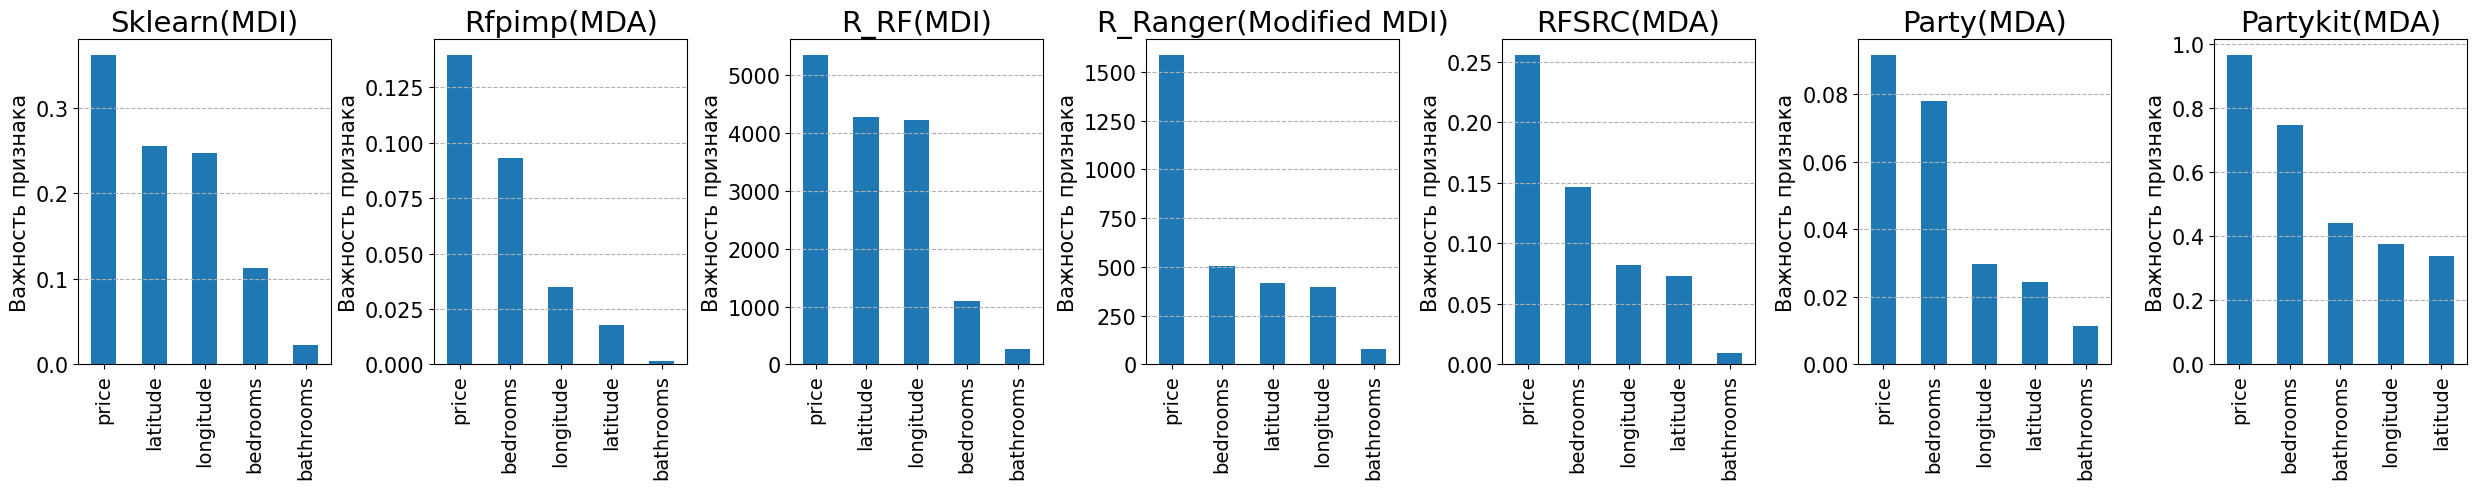

In [3]:
importance_series_list_1 = experiment(X, y)

In [4]:
importance_series_list_1

[price        0.361834
 latitude     0.255208
 longitude    0.246891
 bedrooms     0.113131
 bathrooms    0.022936
 dtype: float64,
 price        0.139601
 bedrooms     0.093000
 longitude    0.034748
 latitude     0.017931
 bathrooms    0.001520
 dtype: float64,
 price        5352.785027
 latitude     4270.669533
 longitude    4226.887826
 bedrooms     1101.191161
 bathrooms     260.670396
 dtype: float64,
 price        1587.526814
 bedrooms      506.102138
 latitude      417.180620
 longitude     397.990583
 bathrooms      77.172121
 dtype: float64,
 price        0.255598
 bedrooms     0.146244
 longitude    0.082278
 latitude     0.072615
 bathrooms    0.009310
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.091650
 bedrooms     0.077916
 longitude    0.029637
 latitude     0.024269
 bathrooms    0.011236
 Name: party_cforest_importance, dtype: float64,
 price        0.965278
 bedrooms     0.747343
 bathrooms    0.439387
 longitude    0.375032
 latitude     0.339424
 Na

<font size="8">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [5]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2025-12-24 13:48:40,701] A new study created in memory with name: no-name-ab0a40aa-e23d-40df-9c3b-f67f613fed95
[I 2025-12-24 13:48:42,560] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 125, 'max_depth': 1, 'min_samples_leaf': 14, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-24 13:48:44,497] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 137, 'max_depth': 2, 'min_samples_leaf': 20, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-24 13:48:44,951] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 31, 'max_depth': 1, 'min_samples_leaf': 10, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-24 13:48:46,433] Trial 3 finished with value: 0.7019325751627365 and parameters: {'n_estimators': 84, 'max_depth': 6, 'min_samples_leaf': 16, 'max_features': 0

{'n_estimators': 116, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 0.7}
best_params: {'n_estimators': 116, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 0.7}
the importance of sklearn: price             0.338380
latitude          0.151881
longitude         0.150806
bedrooms          0.128458
random_uniform    0.072228
random_normal     0.071746
random_int        0.059019
bathrooms         0.018744
random_binary     0.008738
dtype: float64
the importance of rfpimp: price             0.119947
bedrooms          0.068078
longitude         0.024415
latitude          0.012157
bathrooms         0.001216
random_uniform    0.001114
random_binary     0.000203
random_int       -0.000507
random_normal    -0.001216
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random_uniform + random_normal + random_int + random_binary
Importance matrix shape: (9, 1)
Successfully computed variable importance
the importance

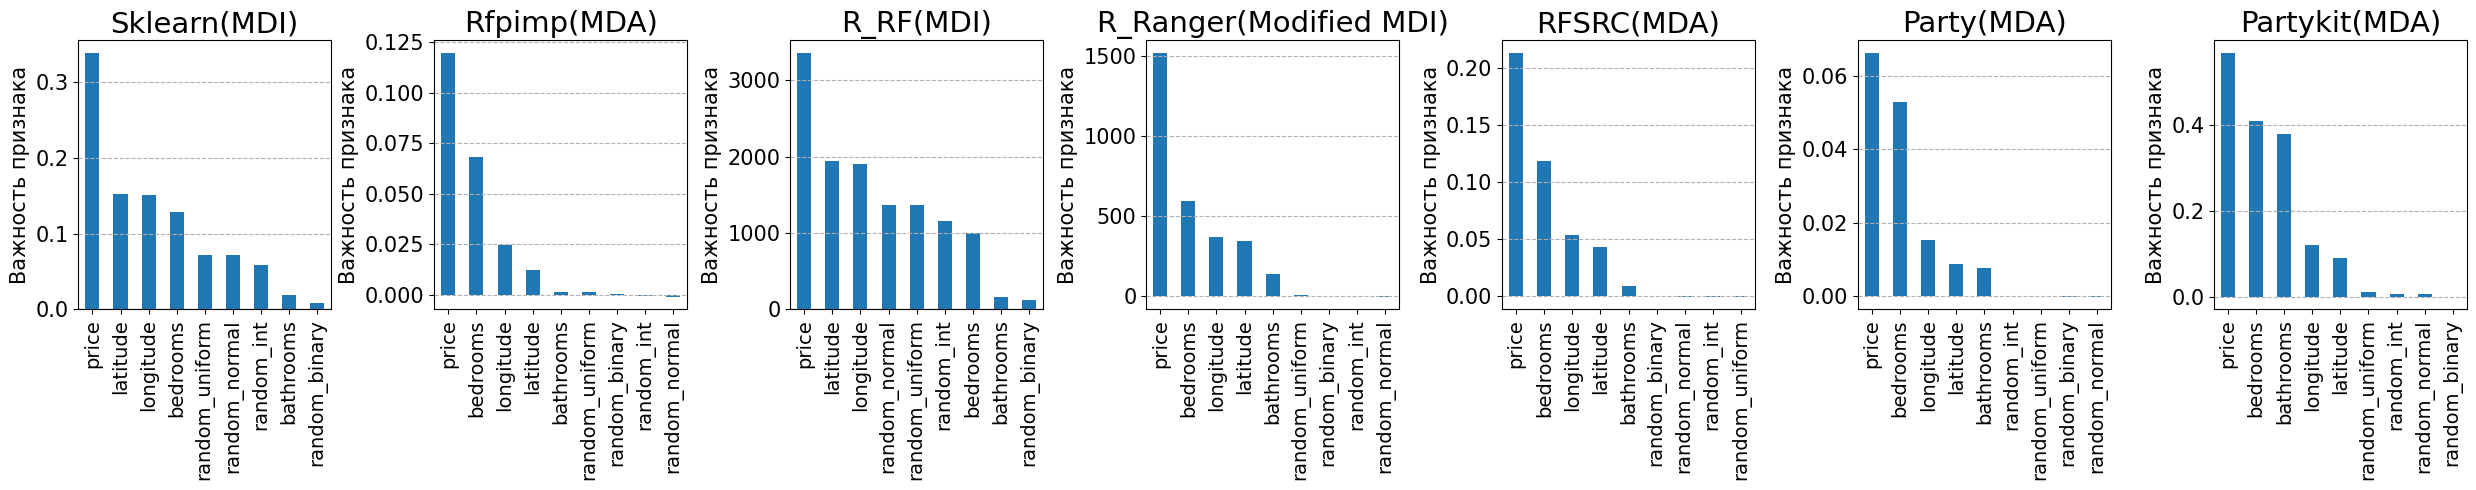

In [6]:
importance_series_list_2 = experiment(X, y)

In [7]:
importance_series_list_2

[price             0.338380
 latitude          0.151881
 longitude         0.150806
 bedrooms          0.128458
 random_uniform    0.072228
 random_normal     0.071746
 random_int        0.059019
 bathrooms         0.018744
 random_binary     0.008738
 dtype: float64,
 price             0.119947
 bedrooms          0.068078
 longitude         0.024415
 latitude          0.012157
 bathrooms         0.001216
 random_uniform    0.001114
 random_binary     0.000203
 random_int       -0.000507
 random_normal    -0.001216
 dtype: float64,
 price             3358.103415
 latitude          1940.974522
 longitude         1900.678979
 random_normal     1371.607322
 random_uniform    1363.075063
 random_int        1159.417917
 bedrooms           996.912869
 bathrooms          160.443224
 random_binary      126.350331
 dtype: float64,
 price             1518.549338
 bedrooms           589.558008
 longitude          364.060052
 latitude           339.055983
 bathrooms          133.620502
 random_uni

<font size="8">Source features + copy of the 'price' feature.</font>

In [8]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2025-12-24 15:02:07,628] A new study created in memory with name: no-name-80ed8f8e-f84b-41f1-9fde-cce3d843a6af
[I 2025-12-24 15:02:09,078] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 109, 'max_depth': 1, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-24 15:02:11,905] Trial 1 finished with value: 0.7116587725741496 and parameters: {'n_estimators': 128, 'max_depth': 10, 'min_samples_leaf': 12, 'max_features': 0.5}. Best is trial 1 with value: 0.7116587725741496.
[I 2025-12-24 15:02:12,709] Trial 2 finished with value: 0.6998302981180821 and parameters: {'n_estimators': 55, 'max_depth': 3, 'min_samples_leaf': 16, 'max_features': 0.5}. Best is trial 1 with value: 0.7116587725741496.
[I 2025-12-24 15:02:14,513] Trial 3 finished with value: 0.7131278336414985 and parameters: {'n_estimators': 72, 'max_depth': 11, 'min_samples_leaf': 14, 'max_features': 0.7}. Best is trial 3 with value: 0.713127833

{'n_estimators': 116, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 1.0}
best_params: {'n_estimators': 116, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 1.0}
the importance of sklearn: latitude     0.251207
longitude    0.247869
bedrooms     0.115994
price1       0.098413
price        0.098182
price3       0.089340
price2       0.085603
bathrooms    0.013392
dtype: float64
the importance of rfpimp: bedrooms     0.097356
longitude    0.036369
latitude     0.026238
price1       0.008712
price2       0.007497
price        0.007395
price3       0.005876
bathrooms    0.000912
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)
Successfully computed variable importance
the importance of  R_randomForest: longitude    3654.667651
latitude     3612.697371
price        1254.918686
price1       1224.216527
price2       1223.184976
price3       1186.808168


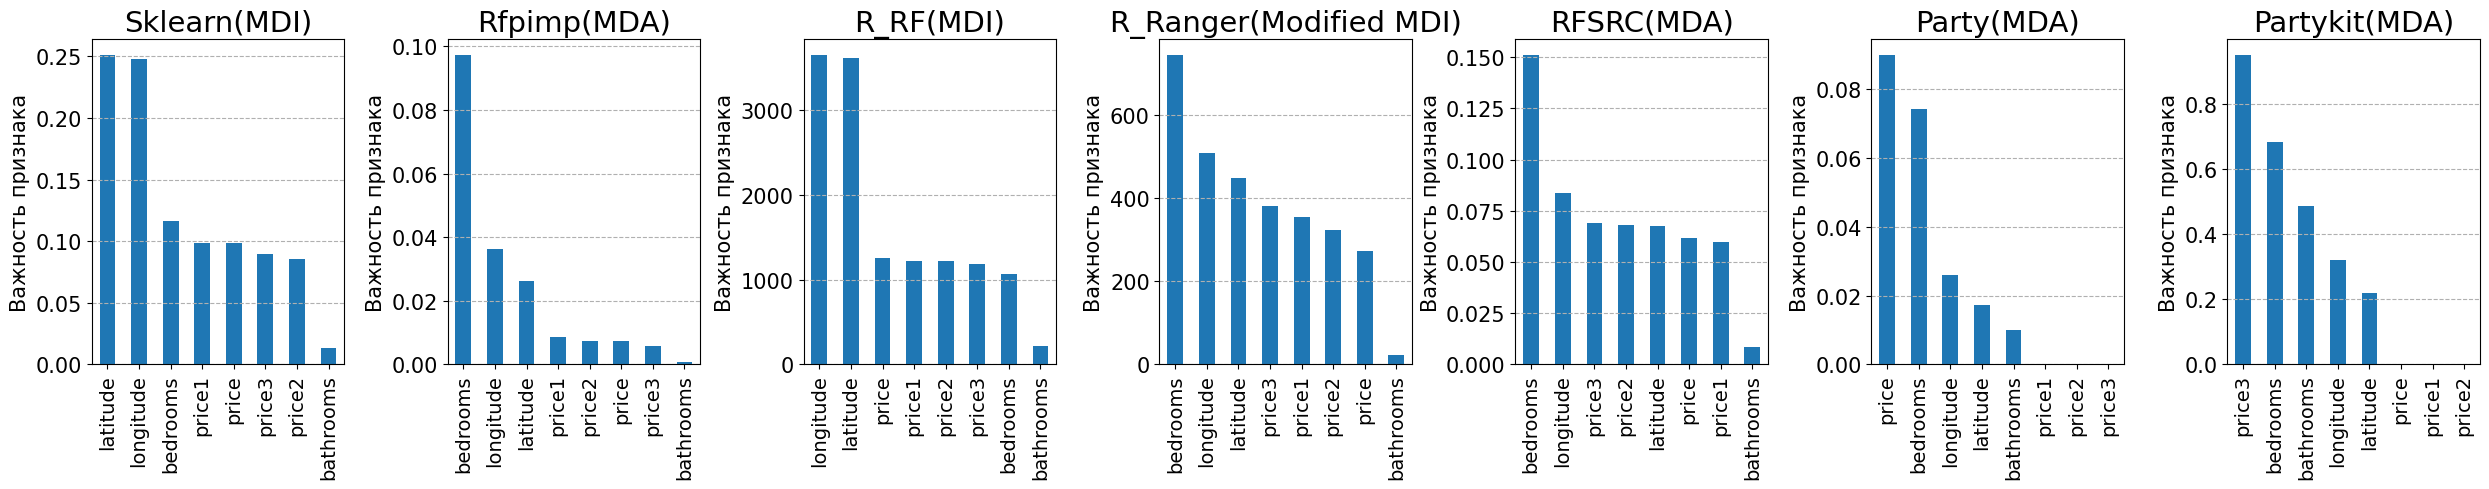

In [9]:
importance_series_list_3 = experiment(X, y)

In [10]:
importance_series_list_3

[latitude     0.251207
 longitude    0.247869
 bedrooms     0.115994
 price1       0.098413
 price        0.098182
 price3       0.089340
 price2       0.085603
 bathrooms    0.013392
 dtype: float64,
 bedrooms     0.097356
 longitude    0.036369
 latitude     0.026238
 price1       0.008712
 price2       0.007497
 price        0.007395
 price3       0.005876
 bathrooms    0.000912
 dtype: float64,
 longitude    3654.667651
 latitude     3612.697371
 price        1254.918686
 price1       1224.216527
 price2       1223.184976
 price3       1186.808168
 bedrooms     1070.596955
 bathrooms     221.120663
 dtype: float64,
 bedrooms     744.700516
 longitude    507.948069
 latitude     448.115787
 price3       380.747736
 price1       355.498803
 price2       323.388095
 price        273.698889
 bathrooms     22.778566
 dtype: float64,
 bedrooms     0.151122
 longitude    0.083712
 price3       0.069188
 price2       0.068153
 latitude     0.067787
 price        0.061915
 price1       0.05

<font size="8">Initial features + random feature random.</font>

In [11]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2025-12-24 16:23:13,923] A new study created in memory with name: no-name-c1860f5a-3f10-44d5-aa04-0312a779548b
[I 2025-12-24 16:23:15,169] Trial 0 finished with value: 0.6967908614270155 and parameters: {'n_estimators': 84, 'max_depth': 2, 'min_samples_leaf': 13, 'max_features': 0.7}. Best is trial 0 with value: 0.6967908614270155.
[I 2025-12-24 16:23:15,896] Trial 1 finished with value: 0.7031990071173476 and parameters: {'n_estimators': 32, 'max_depth': 15, 'min_samples_leaf': 11, 'max_features': 0.25}. Best is trial 1 with value: 0.7031990071173476.
[I 2025-12-24 16:23:17,452] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 127, 'max_depth': 1, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7031990071173476.
[I 2025-12-24 16:23:18,998] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 139, 'max_depth': 1, 'min_samples_leaf': 19, 'max_features': 0.25}. Best is trial 1 with value: 0.70319

{'n_estimators': 132, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 0.5}
best_params: {'n_estimators': 132, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 0.5}
the importance of sklearn: price        0.307260
latitude     0.206995
longitude    0.199338
random       0.159779
bedrooms     0.103139
bathrooms    0.023490
dtype: float64
the importance of rfpimp: price        0.127951
bedrooms     0.083072
longitude    0.025428
latitude     0.014689
bathrooms    0.001824
random       0.000405
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4817.970552
random       4142.160967
latitude     3672.424758
longitude    3596.666267
bedrooms     1085.617693
bathrooms     279.951176
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + 

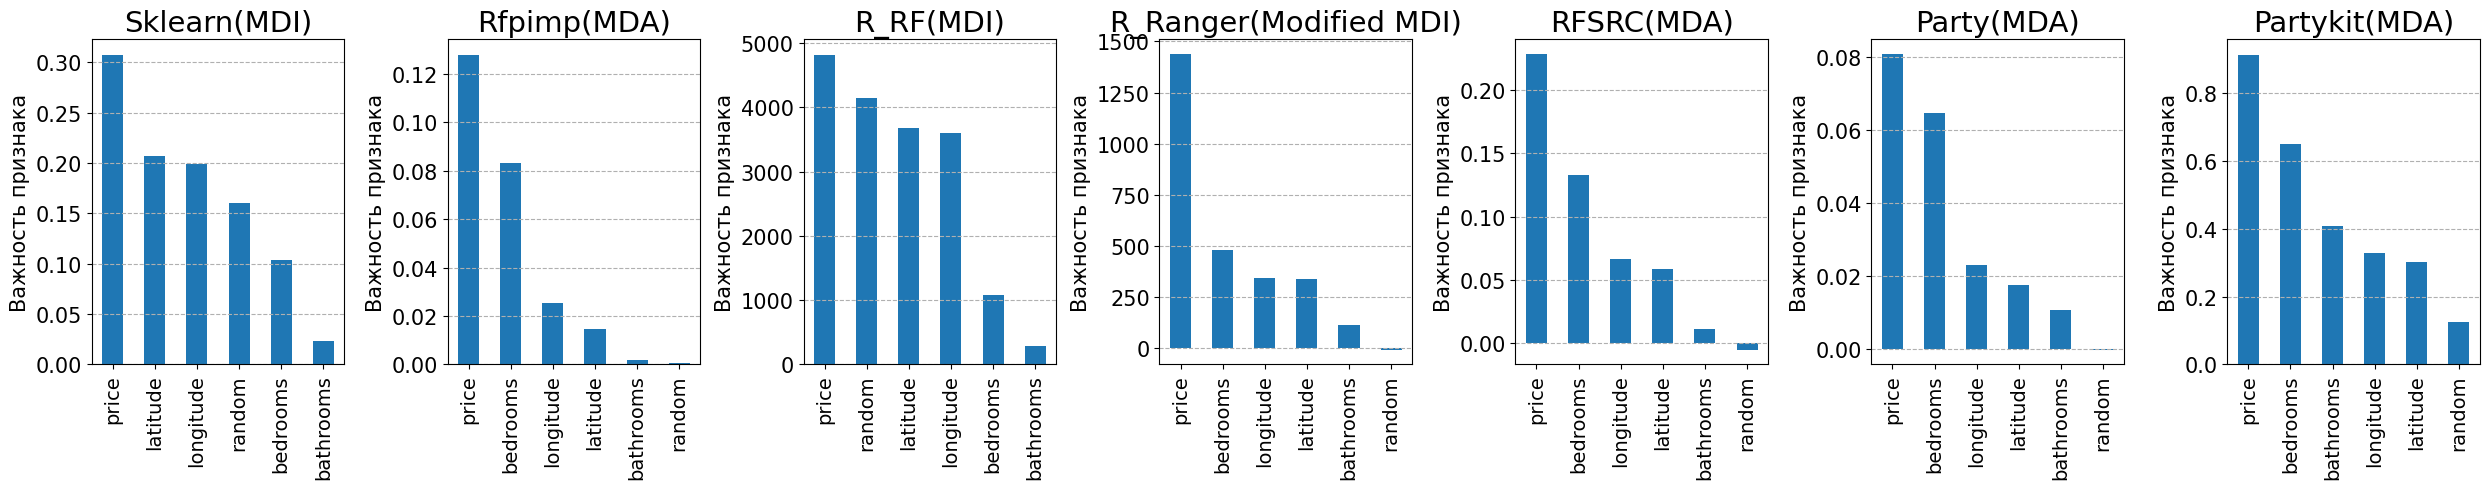

In [12]:
importance_series_list_4 = experiment(X, y)

In [13]:
importance_series_list_4

[price        0.307260
 latitude     0.206995
 longitude    0.199338
 random       0.159779
 bedrooms     0.103139
 bathrooms    0.023490
 dtype: float64,
 price        0.127951
 bedrooms     0.083072
 longitude    0.025428
 latitude     0.014689
 bathrooms    0.001824
 random       0.000405
 dtype: float64,
 price        4817.970552
 random       4142.160967
 latitude     3672.424758
 longitude    3596.666267
 bedrooms     1085.617693
 bathrooms     279.951176
 dtype: float64,
 price        1438.165371
 bedrooms      479.886906
 longitude     340.271812
 latitude      335.350574
 bathrooms     109.667110
 random         -8.706825
 dtype: float64,
 price        0.228169
 bedrooms     0.132785
 longitude    0.066915
 latitude     0.058638
 bathrooms    0.011305
 random      -0.004867
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.080823
 bedrooms     0.064609
 longitude    0.023186
 latitude     0.017585
 bathrooms    0.010698
 random      -0.000105
 Name: party_cforest_im

<font size="8">Rendering all cases.</font>

<font size="4">Source features.</font>

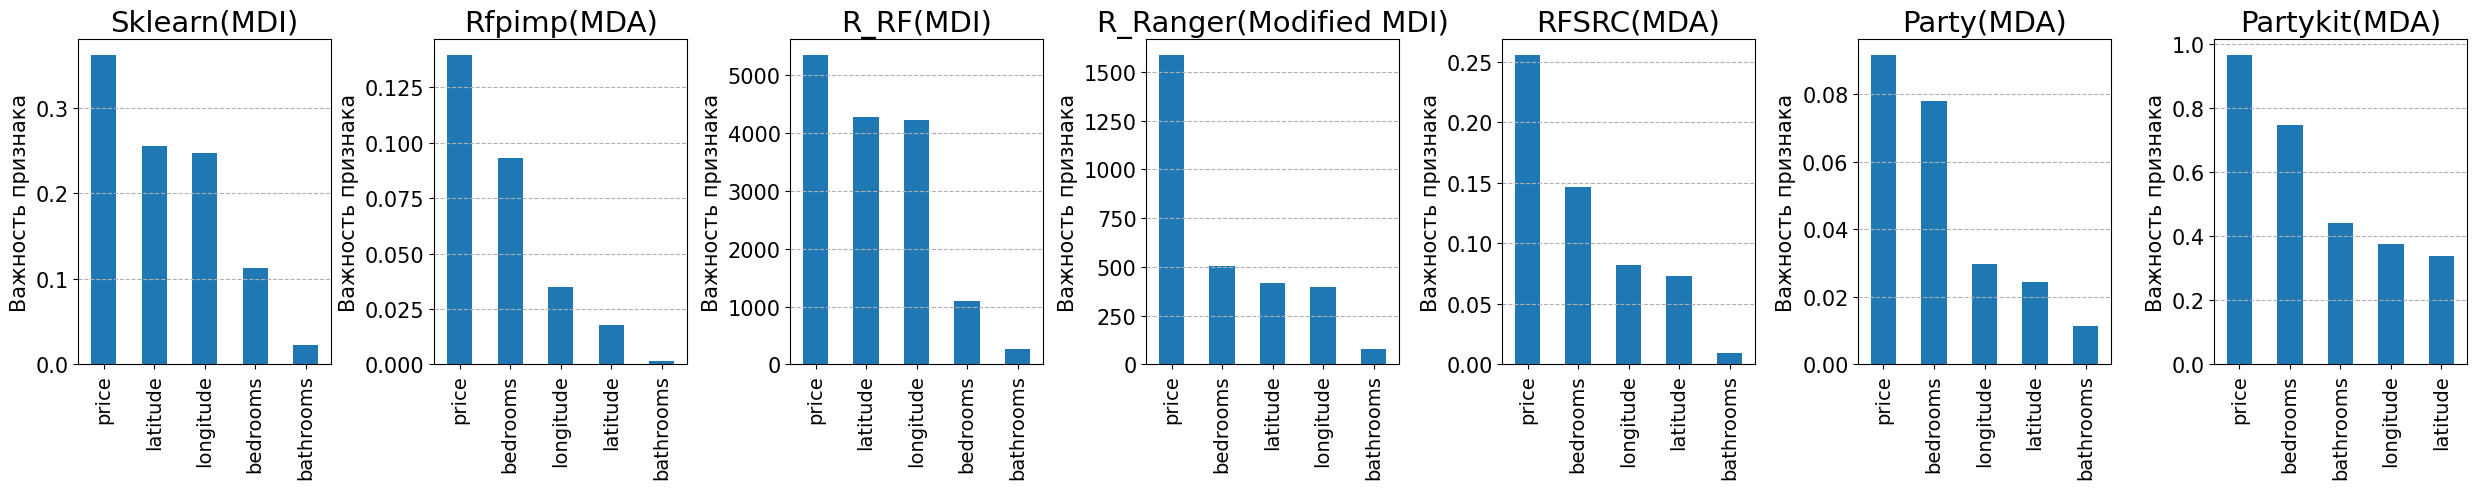

In [14]:
titles_list = ['Sklearn(MDI)', 'Rfpimp(MDA)', 'R_RF(MDI)',
               'R_Ranger(Modified MDI)', 'RFSRC(MDA)', 'Party(MDA)', 'Partykit(MDA)']

picture(importance_series_list_1, titles_list)


<font size="4">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

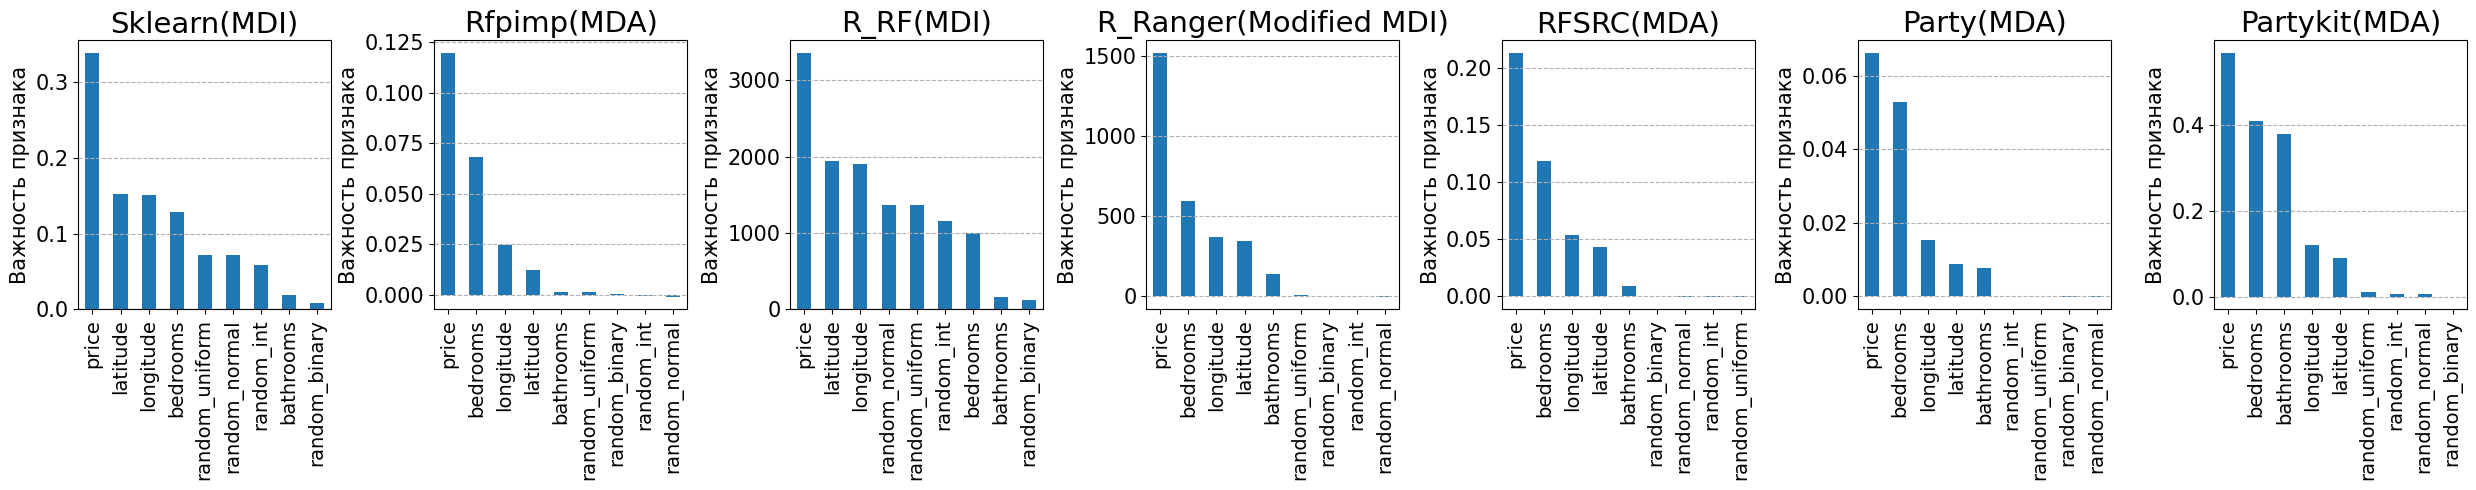

In [15]:
picture(importance_series_list_2, titles_list)

<font size="4">Source features + copy of the 'price' feature.</font>

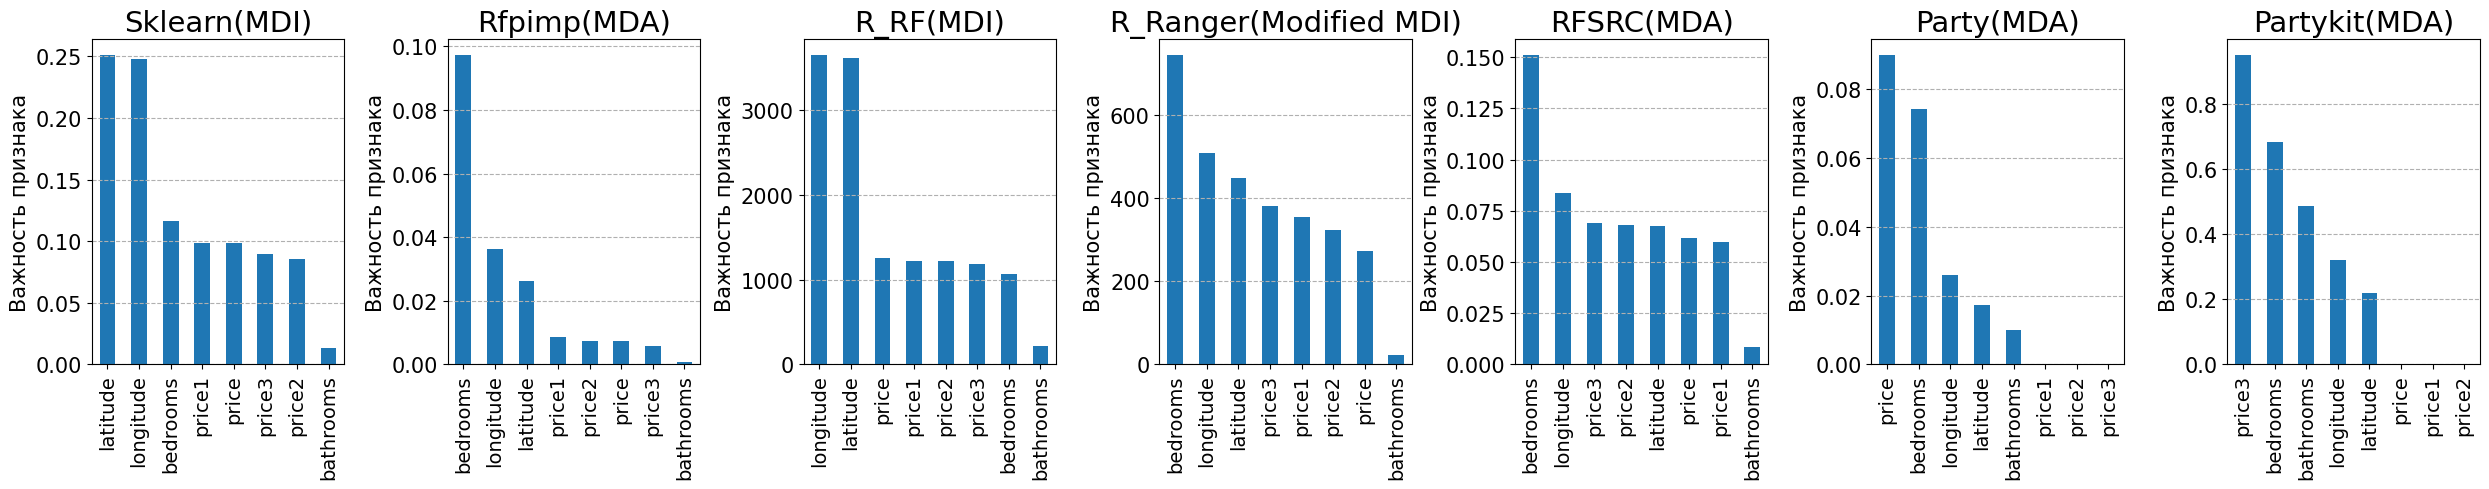

In [16]:
picture(importance_series_list_3, titles_list)

<font size="4">Initial features + random feature random.</font>

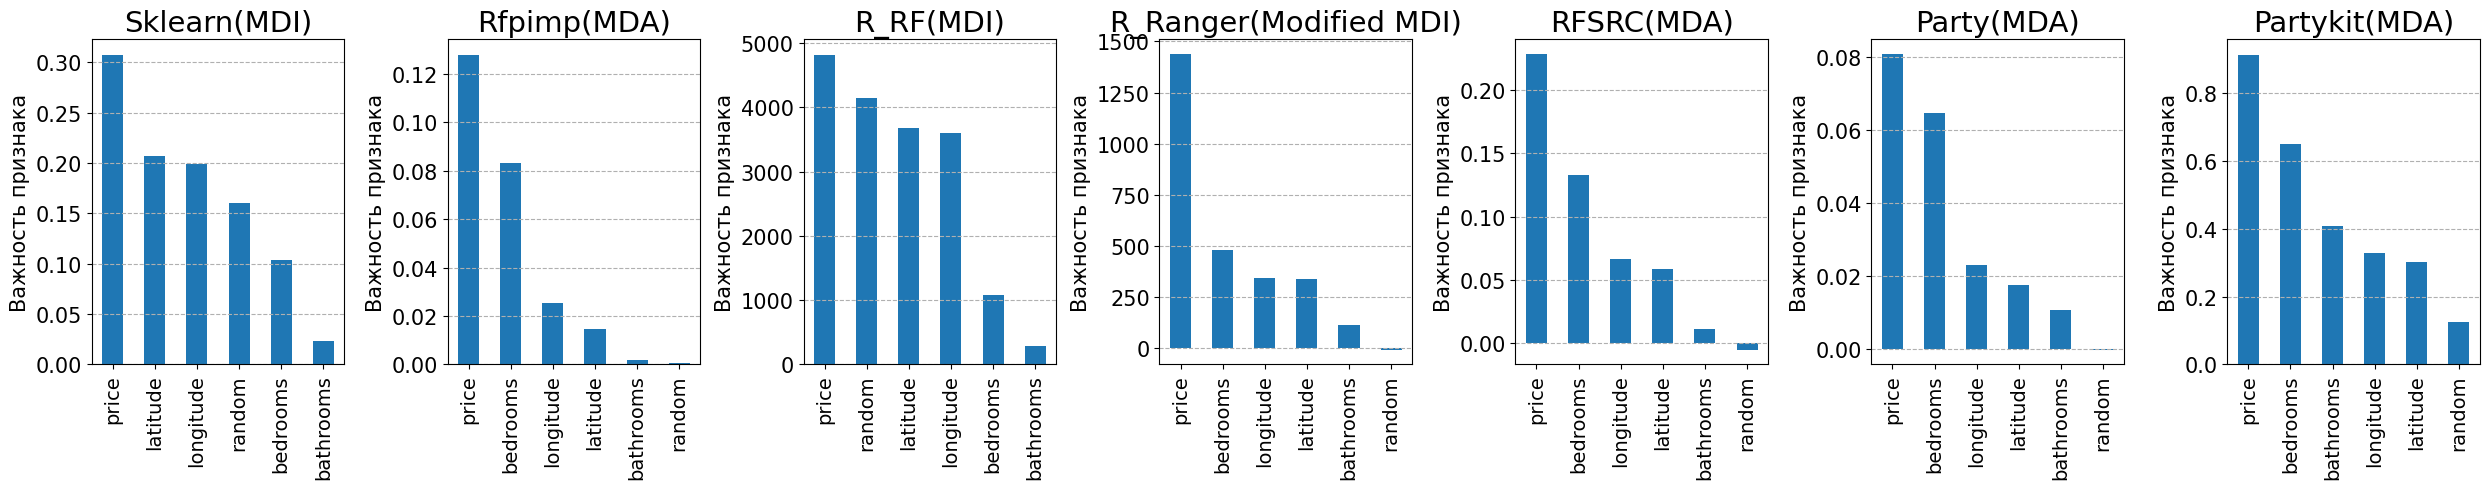

In [17]:
picture(importance_series_list_4, titles_list)